<a href="https://colab.research.google.com/github/nshukla6/2014.jsconf.eu/blob/gh-pages/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import All Libraries**

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import cv2


In [5]:
DATADIR_TRAIN = "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
DATADIR_TEST = "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

**Model-1**

**Visualize the Dataset**

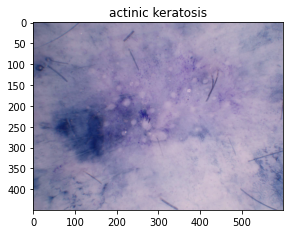

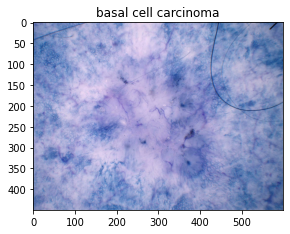

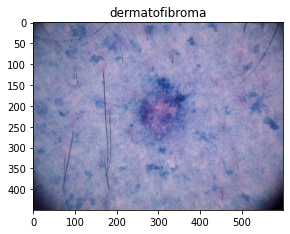

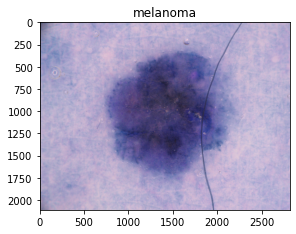

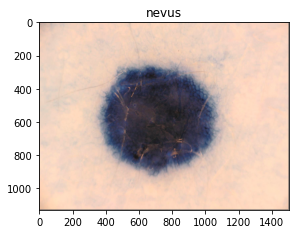

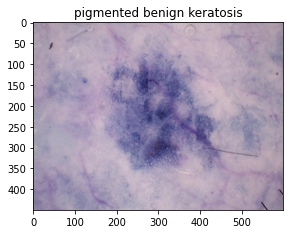

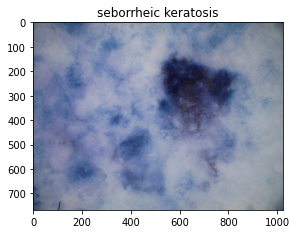

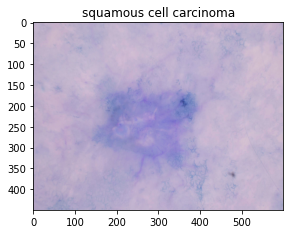

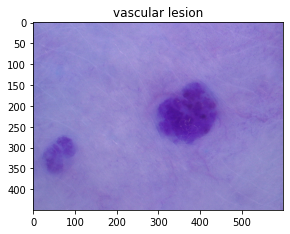

In [6]:
categories = [
    "actinic keratosis",
    "basal cell carcinoma",
    "dermatofibroma",
    "melanoma",
    "nevus",
    "pigmented benign keratosis",
    "seborrheic keratosis",
    "squamous cell carcinoma",
    "vascular lesion",
             ]


count=1
for category in categories:
    fig = plt.figure(figsize=(20,20))
    path = os.path.join(DATADIR_TRAIN, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(5,2,count)
        count += 1
        plt.imshow(img_array)
        plt.title(category)
        plt.show()
        break

In [7]:
img_array.shape

(450, 600, 3)

**Create Dataset**

In [8]:
IMG_SIZE = 180
training_data = []
dct = {}
def get_training_data():
    for category in categories:
        count=0
        path = os.path.join(DATADIR_TRAIN, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            count += 1
            dct[category] = count
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num])
get_training_data()

In [10]:
print(len(training_data))

2254


Randomizing the dataset

In [11]:
import random
random.shuffle(training_data)

In [12]:
x_train = []
y_train = []

for feature, label in training_data:
    x_train.append(feature)
    y_train.append(label)

In [13]:
x_train = np.array(x_train)

In [14]:
x_train.shape

(2254, 180, 180, 3)

In [15]:
x_train = x_train/255

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, len(categories))

In [17]:
y_train.shape

(2254, 9)

Saving the dataset

In [18]:
np.save('x_train.npy',x_train) #saving
np.save('y_train.npy',y_train) #saving
# X=np.load('features.npy')#loading

In [19]:
x_train1 = np.load('x_train.npy')#loading

In [20]:
x_train1.shape

(2254, 180, 180, 3)

In [21]:
y_train1 = np.load('y_train.npy')#loading

In [22]:
y_train1.shape

(2254, 9)

**Model Preparation**

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(180,180,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(21, activation = 'relu'))
model.add(Dense(9,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0

Compile the model

In [26]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

Train Model

In [27]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 47s 52ms/step - loss: 2.2041 - accuracy: 0.1568 - val_loss: 2.0021 - val_accuracy: 0.1840
Epoch 2/20
57/57 [==============================] - 2s 34ms/step - loss: 1.9868 - accuracy: 0.2046 - val_loss: 1.7779 - val_accuracy: 0.2328
Epoch 3/20
57/57 [==============================] - 2s 34ms/step - loss: 1.8067 - accuracy: 0.3366 - val_loss: 1.7079 - val_accuracy: 0.4080
Epoch 4/20
57/57 [==============================] - 2s 34ms/step - loss: 1.7762 - accuracy: 0.3490 - val_loss: 1.5761 - val_accuracy: 0.4412
Epoch 5/20
57/57 [==============================] - 2s 34ms/step - loss: 1.6441 - accuracy: 0.4172 - val_loss: 1.5470 - val_accuracy: 0.4435
Epoch 6/20
57/57 [==============================] - 2s 34ms/step - loss: 1.5899 - accuracy: 0.4594 - val_loss: 1.5700 - val_accuracy: 0.4590
Epoch 7/20
57/57 [==============================] - 2s 34ms/step - loss: 1.6104 - accuracy: 0.4320 - val_loss: 1.5463 - val_accuracy: 0.4412
Epoch 8/20
5

Visulaize training results

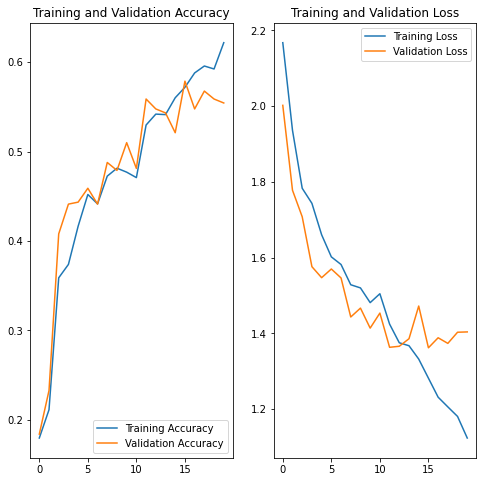

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 20
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**

From the above diagram we can see that the **Training accuracy is 61%** while the **validation accuracy is 55%** which shows that model is **slightly overfitted** and the graph also confirms the same
To avoid overfitting we can use the **Augmentation** Technique

**Model-2**

Augmentation

In [31]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

Model preparation

In [46]:
model2 = Sequential()

model2.add(data_augmentation)

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(180,180,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(21, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(9,activation='softmax'))

Model compilation

In [47]:
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

Training the model

In [48]:
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 4s 45ms/step - loss: 2.2752 - accuracy: 0.1805 - val_loss: 2.0201 - val_accuracy: 0.2262
Epoch 2/20
57/57 [==============================] - 2s 36ms/step - loss: 2.0439 - accuracy: 0.2351 - val_loss: 1.9986 - val_accuracy: 0.1885
Epoch 3/20
57/57 [==============================] - 2s 39ms/step - loss: 2.0014 - accuracy: 0.2698 - val_loss: 1.8558 - val_accuracy: 0.2971
Epoch 4/20
57/57 [==============================] - 2s 36ms/step - loss: 1.9592 - accuracy: 0.2927 - val_loss: 1.8392 - val_accuracy: 0.2927
Epoch 5/20
57/57 [==============================] - 2s 36ms/step - loss: 1.9391 - accuracy: 0.2820 - val_loss: 1.7395 - val_accuracy: 0.3614
Epoch 6/20
57/57 [==============================] - 2s 35ms/step - loss: 1.8574 - accuracy: 0.3217 - val_loss: 1.7711 - val_accuracy: 0.3503
Epoch 7/20
57/57 [==============================] - 2s 35ms/step - loss: 1.8286 - accuracy: 0.3209 - val_loss: 1.6541 - val_accuracy: 0.3991
Epoch 8/20
57

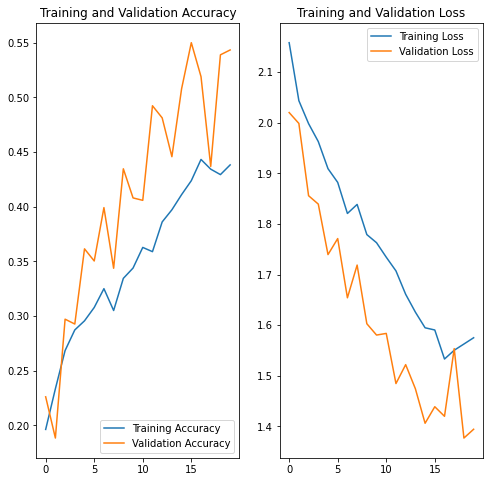

In [49]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Analyzing Model

From the above diagram we can see that the Training accuracy is 44% while the validation accuracy is 54% which shows that model is not overfitted, The same can be confirmed with the above diagram, but to increase the Model accuracy we need to see the data for each class

In [42]:
dct

{'actinic keratosis': 114,
 'basal cell carcinoma': 385,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 468,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

We can clearly see that due to data imbalance model accuracy is low
To overcome this we will use Augmentor library and make the data balance for each class

In [51]:
!pip install Augmentor

In [68]:

import Augmentor
for i in categories:
    path = os.path.join(DATADIR_TRAIN, i)
    p = Augmentor.Pipeline(source_directory=path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8AC037F190>: 100%|██████████| 500/500 [00:20<00:00, 24.56 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A4C1CE090>:   0%|          | 1/500 [00:00<01:23,  5.98 Samples/s]

Initialised with 385 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8AC0328A10>: 100%|██████████| 500/500 [00:19<00:00, 26.02 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A6C042890>:   0%|          | 1/500 [00:00<01:15,  6.64 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A6C480F10>: 100%|██████████| 500/500 [00:18<00:00, 26.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8A6C3CEB50>: 100%|██████████| 500/500 [01:34<00:00,  5.30 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F8A68508250>: 100%|██████████| 500/500 [01:30<00:00,  5.50 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 468 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A6C26B050>: 100%|██████████| 500/500 [00:20<00:00, 24.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8B219CE9D0>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A6870D710>: 100%|██████████| 500/500 [00:18<00:00, 26.38 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A685C4AD0>: 100%|██████████| 500/500 [00:20<00:00, 24.57 Samples/s]


In [54]:
import pathlib
from glob import glob

In [55]:
data_dir_train = pathlib.Path(DATADIR_TRAIN)
data_dir_test = pathlib.Path(DATADIR_TEST)

In [69]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [104]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0]

'/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027354.jpg_575aa2c6-9939-4e2a-ad01-0fd8e6b6a3e5.jpg'

In [105]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0]

'pigmented benign keratosis'

In [106]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [107]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [108]:
df2['Label'].value_counts()

pigmented benign keratosis    500
nevus                         500
seborrheic keratosis          500
dermatofibroma                500
basal cell carcinoma          500
vascular lesion               500
melanoma                      500
actinic keratosis             500
squamous cell carcinoma       500
Name: Label, dtype: int64

In [109]:
batch_size = 32
img_height = 180
img_width = 180

In [112]:
data_dir_train= DATADIR_TRAIN
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6754 files belonging to 9 classes.
Using 5404 files for training.


In [132]:
train_ds

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [113]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6754 files belonging to 9 classes.
Using 1350 files for validation.


In [126]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [124]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [137]:
model3 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(364, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

In [142]:
model3.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [143]:
history = model3.fit(train_ds,validation_data=val_ds, epochs=20)

Epoch 1/20


ValueError: ignored